In [ ]:
hype of lstm

In [ ]:
from gensim.models import Word2Vec
# from gensim.models.word2vec import LineSentence

# Sample sentences (replace with your own text data)
sentences = [
    ["word", "embedding", "example"],
    ["word2vec", "model", "training"],
    ["gensim", "library", "example"]
]

# Training the Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5,sg = 0, min_count=1, workers=4)

# Save the trained model to a file
model.save("word2vec_model.bin")

# Load the model from the file
loaded_model = Word2Vec.load("word2vec_model.bin")

# Accessing word vectors
word_vector = loaded_model.wv['word']

# Finding similar words
similar_words = loaded_model.wv.most_similar('word', topn=3)

# Print the results
print("Word Vector for 'word':", word_vector)
print("Most similar words to 'word':", similar_words)


In [ ]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

# Sample sentences (replace with your own text data)
sentences = [
    ["word", "embedding", "example"],
    ["word2vec", "model", "training"],
    ["gensim", "library", "example"]
]

# Skip-gram model
skipgram_model = Word2Vec(sentences, vector_size=100, window=5, sg=1, min_count=1, workers=4)

# Save the skip-gram model to a file
skipgram_model.save("word2vec_skipgram_model.bin")

# Load the skip-gram model from the file
loaded_skipgram_model = Word2Vec.load("word2vec_skipgram_model.bin")

# Negative sampling model
neg_sampling_model = Word2Vec(sentences, vector_size=100, window=5, sg=1, min_count=1, workers=4, negative=5)

# Save the negative sampling model to a file
neg_sampling_model.save("word2vec_neg_sampling_model.bin")

# Load the negative sampling model from the file
loaded_neg_sampling_model = Word2Vec.load("word2vec_neg_sampling_model.bin")

# Accessing word vectors
word_vector_skipgram = loaded_skipgram_model.wv['word']
word_vector_neg_sampling = loaded_neg_sampling_model.wv['word']

# Finding similar words
similar_words_skipgram = loaded_skipgram_model.wv.most_similar('word', topn=3)
similar_words_neg_sampling = loaded_neg_sampling_model.wv.most_similar('word', topn=3)

# Print the results
print("Word Vector (Skip-gram) for 'word':", word_vector_skipgram)
print("Most similar words (Skip-gram) to 'word':", similar_words_skipgram)

print("\nWord Vector (Negative Sampling) for 'word':", word_vector_neg_sampling)
print("Most similar words (Negative Sampling) to 'word':", similar_words_neg_sampling)


In [ ]:
from nltk.tokenize import word_tokenize

words = word_tokenize(tweet)
print('Using NLTK :',words)

In [ ]:
    import nltk                                # Python library for NLP
    from nltk.corpus import twitter_samples  
    from nltk.corpus import stopwords          # module for stop words that come with NLTK
    from nltk.stem import PorterStemmer        # module for stemming
    from nltk.stem import WordNetLemmatizer    # module for Lemmatization

    from nltk.tokenize import TweetTokenizer
    nltk.download('wordnet')
    nltk.download('omw-1.4')

In [ ]:
    # Import the english stop words list from NLTK
    nltk.download("stopwords")
    stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

        print('\nPunctuation\n')
        print(string.punctuation)

In [ ]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)

In [ ]:
Remove hyperlinks, hashtags etc.
Tokenizing
Remove stopwords and punctuation
Stemming

In [ ]:
def process_tweet(tweet):
    lemmatizer = WordNetLemmatizer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks    
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            lemma_word = lemmatizer.lemmatize(word)  # stemming word
            tweets_clean.append(lemma_word)

    return tweets_clean

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Sample NLP data (text and labels)
texts = ["This is a positive review.", "Negative sentiment here.", "A positive comment.", "Not a good experience."]
labels = [1, 0, 1, 0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Create a Logistic Regression model with L1 regularization (Lasso)
model_l1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
model_l1.fit(X_train_vectorized, y_train)

# Create a Logistic Regression model with L2 regularization (Ridge)
model_l2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
model_l2.fit(X_train_vectorized, y_train)

# Predict using the models
y_pred_l1 = model_l1.predict(X_test_vectorized)
y_pred_l2 = model_l2.predict(X_test_vectorized)

# Evaluate the models
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)

print("Accuracy (L1 Regularization):", accuracy_l1)
print("Accuracy (L2 Regularization):", accuracy_l2)


In [ ]:
# Setting up the NLTK to pre-processing textual data
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('universal_tagset')
nltk.download('treebank')

sns.set_theme(style="darkgrid")
pd.set_option("display.max_columns", 100)
%matplotlib inline

In [ ]:
Creating a Bag of Words (BoW) model from scratch involves several steps, such as tokenization, vocabulary creation, and frequency counting. Here's a simple Python code to create a BoW model from a list of documents:

python
Copy code
from collections import defaultdict
import string

# Sample documents
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

# Tokenization and preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = text.split()
    return tokens

# Create a vocabulary from the documents
vocabulary = set()
for document in documents:
    tokens = preprocess_text(document)
    vocabulary.update(tokens)

# Assign a unique index to each word in the vocabulary
word_to_index = {word: index for index, word in enumerate(vocabulary)}

# Initialize a dictionary to store word frequencies for each document
word_frequencies = [defaultdict(int) for _ in range(len(documents))]

# Count word frequencies
for doc_idx, document in enumerate(documents):
    tokens = preprocess_text(document)
    for token in tokens:
        word_idx = word_to_index[token]
        word_frequencies[doc_idx][word_idx] += 1

# Convert word frequencies to a matrix (Bag of Words)
bow_matrix = []
for doc_idx in range(len(documents)):
    document_vector = [0] * len(vocabulary)
    for word_idx, frequency in word_frequencies[doc_idx].items():
        document_vector[word_idx] = frequency
    bow_matrix.append(document_vector)

# Print the vocabulary and BoW matrix
print("Vocabulary:", vocabulary)
print("Bag of Words Matrix:")
for doc_vector in bow_matrix:
    print(doc_vector)
This code tokenizes the documents, builds a vocabulary, and creates a Bag of Words matrix. The BoW matrix represents each document as a vector, where each element of the vector corresponds to the frequency of a word in the vocabulary. This is a basic example, and you can further enhance it for more advanced NLP tasks.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

corpus = ["pinki is a mother", "instructor employer pinki pinki is a monster"]

cv = CountVectorizer()
# Learn the vocabulary dictionary and return document-term matrix
bow_rep = cv.fit_transform(corpus).todense()  # todense() returns a matrix
# create dataframe
df = pd.DataFrame(bow_rep)
# Get output feature names for dataframe columns.
df.columns = cv.get_feature_names_out()
# df.index = ["Document 1", "Document 2"]
# display(df)
df


,employer,instructor,is,monster,mother,pinki
0,0,0,1,0,1,1
1,1,1,1,1,0,2


In [3]:
# tf idf

# sample data
corpus = [
    
        "it was the best of times",
        "it was the worst of times",
        "it was the age of wisdom and the age of foolishness"
    
         ] 


def get_term_frequency(corpus):
    
    vocabulary = set([x for x in " ".join(corpus).lower().split(" ")])
    
    term_freq = []
    for sentence in corpus:
        sentence_tf = dict([(v,0) for v in vocabulary])
        for word in word_tokenize(sentence.lower()):
            sentence_tf[word] += 1
        for v in vocabulary:
            sentence_tf[v] /= len(word_tokenize(sentence))
        term_freq.append(sentence_tf)
    return term_freq

term_freq = get_term_frequency(corpus)
df = pd.DataFrame(term_freq)
df.index = corpus
display(df)

NameError: name 'word_tokenize' is not defined

#### What is Inverse Document Frequency (IDF) in TF-IDF?

- Inverse Document Frequency measures `how rare a word (or token) is across corpus`. 
- A `rarer word` (or token) would have a `larger IDF`. There are multiple ways to determine IDF as well. 

- One of the most common formulation is - 
$$IDF(t,C) = log(\frac{|d|}{|{d \in C : t \in d}|})$$

Here,
* $IDF(t,d,C)$ is the Inverse Document Frequency of term $t$ in corpus $C$. As we can see from the formulation, IDF is calculated for each word at corpus level and not for individual documents.
* $|d|$ is the absolute number of documents in the corpus.
* $|{d \in C : t \in d}|$ is the number of documents in corpus $C$ which contains the term $t$

The above formulation is simply the log scaled inverse fraction of documents which contains the term $t$ in the corpus $D$. 

Log is used as it dampens the effect of huge number of documents in the corpus.

Some other formulations of Inverse Document Frequency are - 
1. Smoothened IDF, $$IDF(t,C) = log(\frac{|d|}{1 + |{d \in C : t \in d}|}) + 1$$
2. Max IDF, $$IDF(t,C) = log(\frac{max_{t' \in d}(|{d \in C : t' \in d}|)}{|{d \in C : t \in d}|})$$

In [ ]:
def get_inverse_document_frequency(corpus):
    vocabulary = set([x for x in " ".join(corpus).lower().split(" ")])
    n = len(corpus)
    
    inverse_document_frequency = {}
    for v in vocabulary:
        num_docs = 0
        for sentence in corpus:
            if v in word_tokenize(sentence.lower()):
                num_docs += 1
        inverse_document_frequency[v] = np.log(n/num_docs)
    return inverse_document_frequency

inverse_document_frequency = get_inverse_document_frequency(corpus)
inverse_document_frequency

In [ ]:
def get_tf_idf(corpus):
    tf = get_term_frequency(corpus)
    idf = get_inverse_document_frequency(corpus)
    
    tf_idf = []
    for tf_dict in tf:
        tf_idf_sentence = {}
        for t, term_freq in tf_dict.items():
            tf_idf_sentence[t] = term_freq * idf[t]
        tf_idf.append(tf_idf_sentence)
    
    return tf_idf

tf_idf = get_tf_idf(corpus)
df = pd.DataFrame(tf_idf)
df.index = corpus
display(df)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# using inbuilt TfidfVectorizer() function to calculate TF-IDF
tf_idf_vectorizer = TfidfVectorizer()
tf_idf_rep = tf_idf_vectorizer.fit_transform(corpus).todense()
df = pd.DataFrame(tf_idf_rep)
df.columns = tf_idf_vectorizer.get_feature_names()
df.index = corpus
display(df)

In [ ]:
We see that...
TF-IDF
It computes the feature importances of a word in a document of a corpus
It can detect and nullify the effect of stopwords on feature vector of a sentence
Bag Of Words
It computes the frequencies (or) presence of a word in a document of a corpus
It assigns equal priority to every word. It cannot detect stopwords

In [ ]:
text preprocessing parameters: lowercase, strip_accent, stop_words, etc
norm: to apply l1 & l2 norm

ngram_range: range of n-values for different n-grams to be extracted
sublinear_tf: Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf)

In [ ]:
Builds over CountVectorizer to penalize highly frequent words & low-frequency terms in a corpus.
IDF aims to reduce noise in our matrix.


TF-IDF can be used to filter out uncommon & irrelevant words easily helping model train & converge faster.


### 2. Cosine Distance

- Before we look at cosine distance, let us look at cosine similarity, because that is what we usually see being used at most places. 
- Cosine similarity measures the similarity between two vectors, and is `mathematically represented as the cosine of angle between the 2 vectors`. 
- As the definition suggests, cosine similarity only depends on the angle between the vectors and not the magnitude between the vectors.

$$cosine \hspace{0.1cm} similarity = cos(\theta) =  \frac{\sum_{i}^{N}X_i.Y_i}{\sqrt{\sum_{i}^{N}(X_i)^2 } \sqrt{\sum_{i}^{N}(Y_i)^2 }}$$

Here,
* $X$ and $Y$ are the 2 vectors.
* $\theta$ is the angle between $X$ and $Y$.

As per above formulation, $cosine \hspace{0.1cm} similarity$ can range from $-1$ to $1$. Two vectors which lie on the same line ($\theta = 0$) have a cosine similarity of $1$ and two vectors which lie in opposite direction to each other ($\theta = 180$) have a cosine similarity of -1.

###Cosine distance is calculated as  - 

$$cosine \hspace{0.1cm} distance = 1 - cosine \hspace{0.1cm} similarity$$

- **Cosine distance can range from 0 to 2.**

[euclidean-distance-vs-cosine-similarity](https://www.baeldung.com/cs/euclidean-distance-vs-cosine-similarity)

`Vectors with a small Euclidean distance from one another are located in the same region of a vector space. Vectors with a high cosine similarity are located in the same general direction from the origin`.

### Cosine vs. Euclidean - which one to use ? 

- Cosine Similarity is typically used in the cases when the magnitude of the vector does not matter. 

* **For example:**

> In the cases of textual representation using something like BOW, a word like "cricket" might be present 50 times in one document which has 1000 words, and 5 times in another document with 100 words. It we calculate the distance using euclidean metric, we might not find the two documents very similar. But this is because of the difference in the length between the 2 documents. Cosine similarity accounts for this very well as this does not look at the magnitude but the angle between the documents (represented by vectors). And here, even though the difference in magnitude is high, the angle will be small.

In [ ]:
# 3 words represented by BOW vectors
king = [1, 0, 0]
man = [0, 1, 0]
water = [0, 0, 1]
# calculate cosine distance
def cosine_distance(x, y):
    return 1 - np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

print("Cosine Distance")
print("Between {} and {} : {}".format("king", "man", cosine_distance(king, man)))
print("Between {} and {} : {}".format("king", "water", cosine_distance(king, water)))
print("Between {} and {} : {}".format("water", "man", cosine_distance(man, water)))

In [ ]:
pip install contractions

def process_sentence(sentence, nlp_object):
    # Convert to lowercase
    sentence = sentence.lower()
    
    # Exapnding contractions
    sentence = contractions.fix(sentence)
    
    # Lemmatization and removing stopwords
    doc = nlp_object(sentence)
    sentence = " ".join([token.lemma_ for token in doc if not token.is_stop])
    
    # Remove punctuation
    for p in string.punctuation:
        sentence = sentence.replace(p, " ")
    sentence = re.sub(r"\s+", " ", sentence) # Replace all whitespace characters with space
    
    return sentence

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def get_similar_documents(all_article_rep_df, article_id, features):
    # extracting features of a article
    this_article_rep = all_article_rep_df[all_article_rep_df["ID"] == article_id][features]
    other_article_rep = all_article_rep_df[all_article_rep_df["ID"] != article_id][features]
    # calculating cosine similarity
    similarity_matrix = cosine_similarity(this_article_rep, other_article_rep)
    similar_articles = list(zip(similarity_matrix[0].tolist(), all_article_rep_df["TITLE"].tolist()))
    # sorting
    similar_articles = sorted(similar_articles, key = lambda x : x[0], reverse = True)
    print("Reference Article : {}".format(all_article_rep_df[all_article_rep_df["ID"] == article_id]["TITLE"].values[0]))
    
    print("**** Similar Articles ****")
    # top 5 similar articles
    for score, title in similar_articles[:5]:
        print(title)
    print()

# Let us check top 5 similar articles for some of the articles in our corpus
get_similar_documents(bow_features_df, 90, count_vectorizer.get_feature_names_out())
get_similar_documents(bow_features_df, 80, count_vectorizer.get_feature_names_out())
get_similar_documents(bow_features_df, 150, count_vectorizer.get_feature_names_out())
get_similar_documents(bow_features_df, 205, count_vectorizer.get_feature_names_out())

In [ ]:
# TF-IDF representation of the dataset Using TfidfVectorizer from scikit-learn
tfidf_vectorizer = TfidfVectorizer(min_df=5)
# min_df: ignore terms that have a document frequency strictly lower than the given threshold.
tfidf_features = tfidf_vectorizer.fit_transform(articles["processed_text"]).todense()  # todense() returns a matrix
# create dataframe
tfidf_features_df = pd.DataFrame(tfidf_features)
tfidf_features_df.columns = tfidf_vectorizer.get_feature_names()  # Get output feature names for dataframe columns.
tfidf_features_df["TITLE"] = articles["title"]
tfidf_features_df["ID"] = articles["id"]
display(tfidf_features_df)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample text documents
document1 = "This is the first document."
document2 = "This document is the second document."
document3 = "And this is the third one."
document4 = "Is this the first document?"

# Create a list of text documents
documents = [document1, document2, document3, document4]

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Compute the TF-IDF vectors for the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Calculate the cosine similarity between documents
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Print the cosine similarity matrix
print("Cosine Similarity Matrix:")
print(cosine_similarities)

# Calculate the cosine similarity between two specific documents (e.g., document1 and document2)
similarity_score = cosine_similarities[0][1]
print(f"Cosine Similarity between document1 and document2: {similarity_score:.2f}")


In [ ]:

Here is a simple implementation of the Continuous Bag-of-Words (CBOW) model from scratch in Python:

Python

In [ ]:
import numpy as np

class CBOW:
    def __init__(self, vocabulary_size, embedding_dim):
        self.vocabulary_size = vocabulary_size
        self.embedding_dim = embedding_dim
        self.W_in = np.random.randn(vocabulary_size, embedding_dim)
        self.W_out = np.random.randn(embedding_dim, vocabulary_size)

    def one_hot_encode(self, target):
        one_hot = np.zeros(self.vocabulary_size)
        one_hot[target] = 1
        return one_hot

    def train(self, context, target, learning_rate=0.01):
        context_vectors = np.mean([self.W_in[word] for word in context], axis=0)
        output = np.dot(context_vectors, self.W_out)
        predicted_probs = np.exp(output) / np.sum(np.exp(output))

        target_one_hot = self.one_hot_encode(target)
        error = predicted_probs - target_one_hot

        # Update output layer weights
        self.W_out -= learning_rate * np.outer(context_vectors, error)

        # Update input layer weights
        for word in context:
            self.W_in[word] -= learning_rate * np.dot(self.W_out, error)

    def get_word_vector(self, word_index):
        return self.W_in[word_index]

# Example Usage
vocab_size = 10
embedding_dim = 3
cbow_model = CBOW(vocab_size, embedding_dim)

# Example training data
context = [1, 2, 3]  # Indices of context words
target = 4           # Index of the target word

# Training the model
cbow_model.train(context, target)

# Get the word vector for a specific word
word_index = 2
word_vector = cbow_model.get_word_vector(word_index)

print("Word Vector for word at index {}: {}".format(word_index, word_vector))


In [ ]:
from gensim.models import Word2Vec

# Sample tokenized corpus (replace with your own)
tokenized_corpus = [
    ["this", "is", "a", "sample", "sentence"],
    ["another", "example", "of", "a", "sentence"],
    ["word", "embeddings", "are", "useful"],
]

# Initialize and train the CBOW Word2Vec model
model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=100,  # Dimensionality of word vectors
    window=5,         # Context window size
    sg=0,             # Training algorithm: CBOW (0) or Skip-gram (1)
    epochs=50,        # Number of training epochs
    min_count=1,      # Minimum word frequency for inclusion in the vocabulary
    workers=4,        # Number of CPU cores to use for training
)

# Save the trained model to a file
model.save("word2vec_cbow.model")

# Load the model later using:
# model = Word2Vec.load("word2vec_cbow.model")

# Access word vectors
word_vector = model.wv['sample']
print("Vector for 'sample':", word_vector)

# Find similar words
similar_words = model.wv.most_similar("sample", topn=5)
print("Words most similar to 'sample':", similar_words)


In [ ]:
What are the advantages and disadvantages of Word2Vec?
What are some common applications of Word2Vec?
What are some of the hyperparameters that need to be tuned when training a Word2Vec model?

In [ ]:
learn about svd


## Let us deep-dive into CBoW!!
- CBoW uses a **shallow feed forward neural network** with single hidden layer to produce word embeddings (vectors).
- Given a word, CBoW **uses before and after words**, called as the **context words**, to create a vector representation.

## Architecture of CBoW:

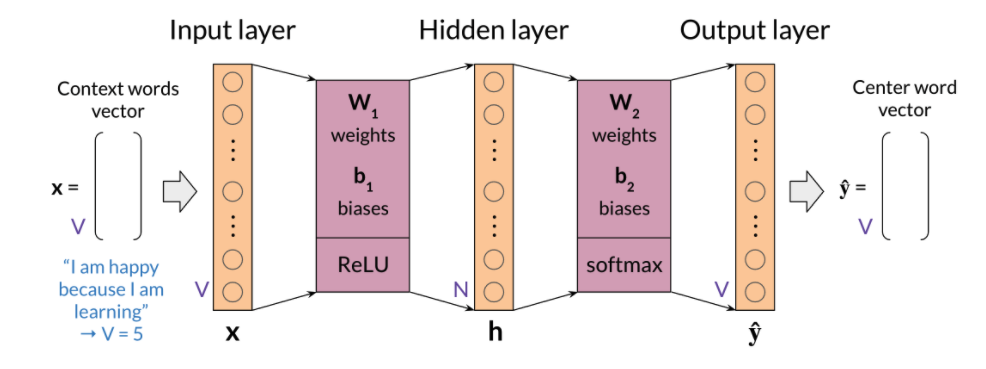

- **Input Layer**
    - Takes in **context words** as inputs.
    - Is of the size **V**, size of the vocabulary (unique words in corpus).
- **Hidden Layer**
    - Is of the size **N**, a hyper-parameter of the network that **defines the shape of word representations**.
    - **ReLU** used as the activation function.
- **Output Layer**
    - Outputs **probability** for all the words in the vocabulary.
    - Is of the size **V**, size of the vocabulary (unique words in corpus).
    - Uses **softmax** function to output probabilities.
    
## How do we generate training data for CBoW?

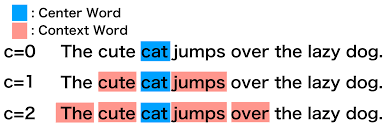

- Training data is generated by iterating through the corpus using a **sliding window** action to **define the target word and its context words**.
- The **window size** (size of the sliding window) determines the **number of before and words to consider** when predicting the target word.

## Working of CBoW
**CBoW models the problem as a multi-class classification, wherein given the context words, the model outputs the target word and in doing so learns the representation for the words.**


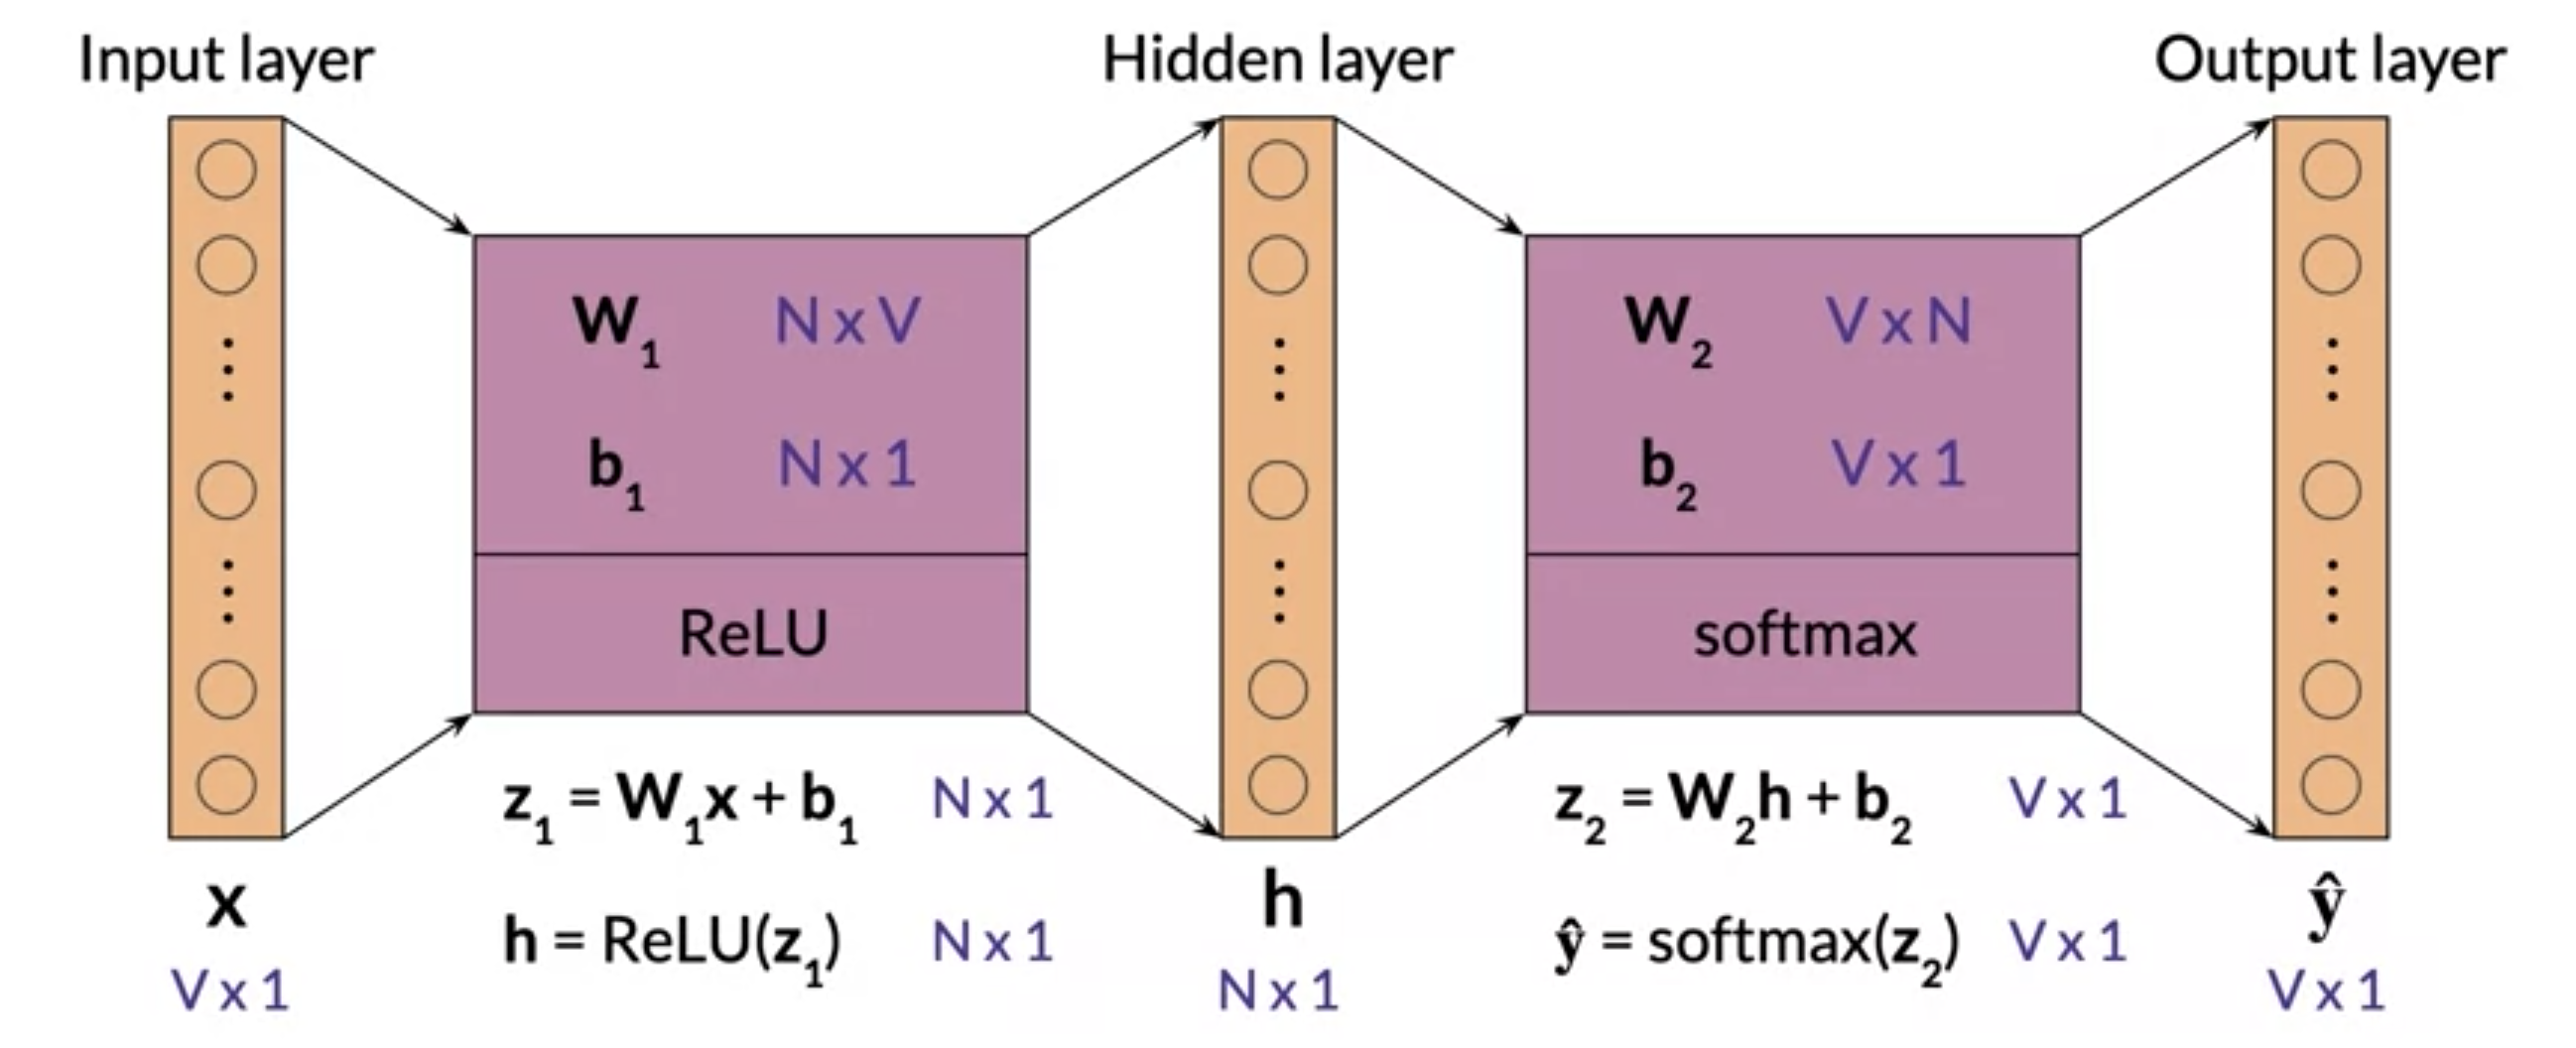

- **One-hot encoded representation** (V rows X 1 column) of the **context word/words** are sent in as input.
- Weight matrix **W$_1$** is initialized.
- Weighted sum of the inputs and the weights (W$_1$) with bias b$_1$ is **passed through ReLU activation** function to **produce output at hidden layer 'h'**.
    - Weight matrix (W$_1$) is of **shape N x V**, where N is the dimension along which we want to represent our word vectors and V is size of vocabulary.
    - z$_1$ = W$_1$x + b$_1$
    - h = ReLU(z$_1$) --> Output at hidden layer
- Similarly, weighted sum of output of hidden layer and weight matrix **W$_2$** with bias b$_2$ is **passed through softmax activation** function to produce probabilities of all words in the vocabulary.
    - The weight matrix W$_2$  takes a shape of V rows and N columns.
    - z$_2$ = W$_2$x + b$_2$
    - ŷ = softmax(z$_2$) --> Final output/prediction
- The word with the **highest probability** is considered as the model's prediction of the **target word**, i.e. **argmax(P(ŷ))**.
- The weight matrix **W$_1$** is **considered as the vector representation** of the words.


## How does the model learn the right word representations?
- CBOW uses **cross-entropy loss** as the objective function during training
  - J = -$Σ^{V}_{k=1}y_k\logŷ_{k}$
- During **back-propogation**, the network tries to **reduce this cost function**.

## What is Skip-Gram?
- Skip-Gram is simply an **inversion of the CBoW** architecture.
- Takes in **input** as **center/context word** and **predict** its **surrounding words**.

## Architecture of Skip-Gram

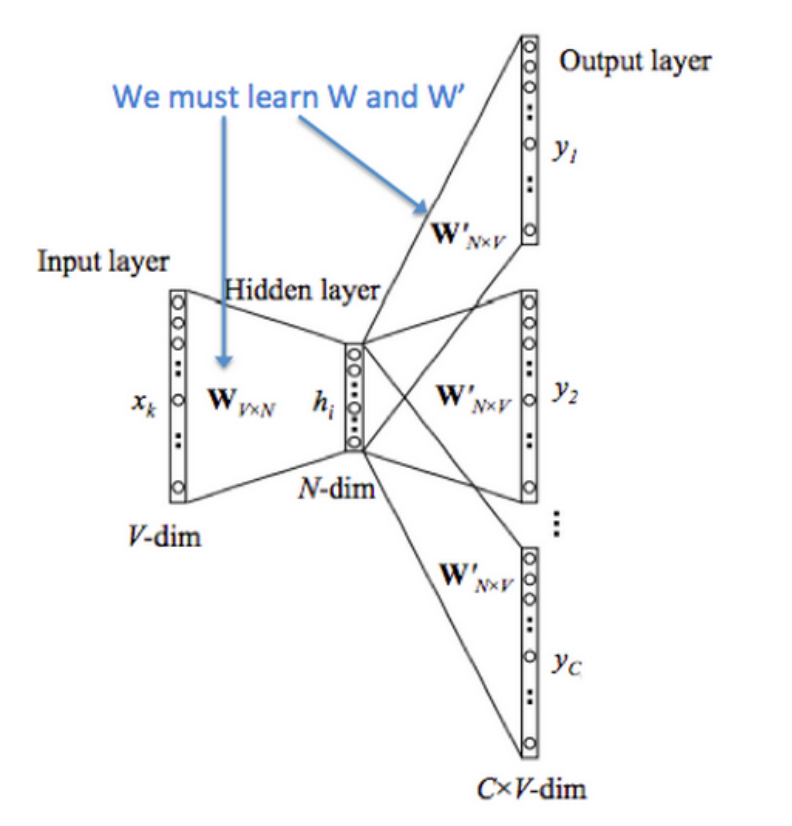

## Working of Skip-Gram
- **Input** $(x)$ is **one-hot encoded representation** of the **center word** of size |V| (vocabulary's size).
- **Weighted sum of the input** and weight matrix $W_{VxN}$ is passed on through the **hidden layer** that has linear activation.
- Output layer applies a **dot product** between the output from hidden layer **$h_{1}$  and  𝑊‘$_{N𝑥V}$** resulting in the output vector U.
- The **output vector U** is passed through **softmax activation function** to produce probabilities of observing each context word (based on window size) - $y'^{c-m}$, . . . , $y'^{c-1}$, $y'^{c+1}$, . . . , $y'^{c+m}$.

## How does Skip-Gram learn the right representations?
- **Output probabilities** are **matched** against **true probabilities**.
    - $y^{c-m}$, . , $y^{c-1}$, $y^{c+1}$, . , $y^{c+m}$, the one hot vectors of the surrounding/context words.
- Skip-Gram is trained with objective function of **log likelihood**, i.e. for given center word '$w_j$, predict context words within a fixed window of size m.


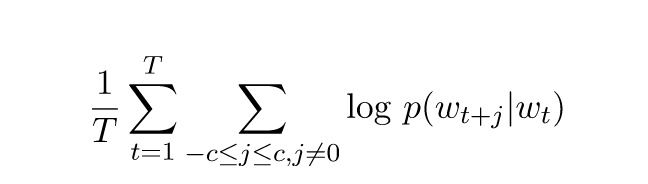

- Objective function tries to **maximize the probability** of any **context word given the current word** $w_t$.
- Model also makes a **bayesian assumption** that given the center word, all the **output words are completely independent**.
- Given the objective function, the model parameters **W and W' are fine-tuned** using gradient descent via backpropogation.
- Similar to CBoW, the **weight matrix $W_1$** is considered as the **word vector**.

## Why Negative Sampling instead of Softmax?

- **Denominator** in **softmax** is a normalizing factor **computed over entire vocabulary**.
- For large vocabulary, **softmax computation** is **highly expensive**.

We over-come the above drawbacks of softmax using **Negative-Sampling**.

- Negative-Sampling **maximizes similarity of words in the same context** and **minimize when they occur in different contexts**.
- Instead of minimizing over all words, Negative-Sampling **randomly samples handful of words (2 < k < 20)** and use them to optimize the objective.
- Each **sample** picked **(word, context)** can be **represented** as a **probability** of whether or not this pair is **near each other** in training data.


In [ ]:
Here is a simplified Python code example of how to implement negative sampling in Skip-gram:

In [ ]:
# negative sampling
negative_context_words = []
for i in range(self.negative_samples):
    negative_context_word = np.random.randint(0, len(sentence))
    while negative_context_word in context_words:
        negative_context_word = np.random.randint(0, len(sentence))

    negative_context_words.append(negative_context_word)

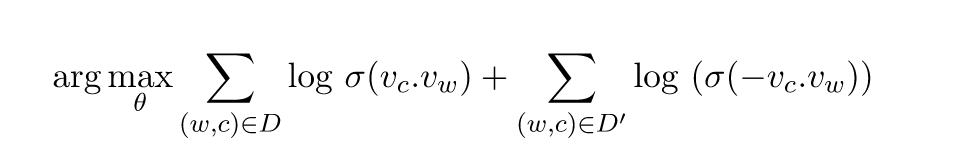

- We **optimize** over these two **probability distributions** to learn word vectors.

- **Large values of k** are chosen for **small dataset** and vice-versa.

In [ ]:
Let us create our base function, which when given a query will retrieve and rank documents based on similarity.

In [ ]:
# Train the Skip-gram model with negative sampling
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, sg=1, min_count=5,      negative=5,      workers=4)
# Train the Word2Vec model with Hierarchical Softmax
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, sg=1, min_count=5,       hs=1,       workers=4)

Hierarchical softmax training is an alternative to negative sampling for training the Skip-Gram word embedding model. It is a more efficient and scalable approach for training word embeddings on large datasets.

Hierarchical softmax training works by constructing a binary tree, where each leaf node represents a word in the vocabulary. The internal nodes of the tree represent the relationships between the words.

To train the model, the algorithm starts at the root node of the tree and traverses the tree down to the leaf node that represents the target word. At each node, the algorithm predicts whether to go left or right based on the embedding vectors of the words represented by the nodes.

The algorithm then updates the embedding vectors of the words along the path that it took to reach the target word.

Hierarchical softmax training is more efficient than negative sampling because it only needs to consider a small number of words at each node of the tree. This makes it possible to train word embeddings on very large datasets.

Here are some of the advantages of using hierarchical softmax training in Skip-Gram:

Faster: Hierarchical softmax training is faster than negative sampling, especially for large datasets.
More scalable: Hierarchical softmax training is more scalable than negative sampling, meaning that it can be used to train word embeddings on very large datasets.
Better performance: Hierarchical softmax training has been shown to improve the performance of Skip-Gram word embeddings on a variety of natural language processing tasks.
However, hierarchical softmax training also has some disadvantages:

More complex: Hierarchical softmax training is more complex to implement than negative sampling.
Requires more memory: Hierarchical softmax training requires more memory than negative sampling.
Overall, hierarchical softmax training is a good choice for training word embeddings on large datasets. It is faster, more scalable, and more effective than negative sampling. However, it is also more complex to implement and requires more memory.

Here is an example of how hierarchical softmax training works:

Suppose we have the following binary tree:

In [ ]:
            dog
         /    \
        cat      bird
      /   \    /   \
    lion  tiger owl   pigeon

We want to train the model to predict the context word for the target word "dog".

The algorithm would start at the root node of the tree and traverse the tree down to the leaf node that represents the target word. In this case, the algorithm would go left at the root node, then left again at the next node, until it reaches the leaf node that represents the target word "dog".

At each node, the algorithm would update the embedding vectors of the words represented by the nodes.

Once the algorithm has reached the leaf node that represents the target word, it would return the embedding vector for the target word.

Hierarchical softmax training is a powerful technique for training word embeddings. It is faster, more scalable, and more effective than negative sampling, especially for large datasets

For a test set W; containing words $w_1$, $w_2$, $w_3$, ... ,$w_n$
- The perplexity can be derived using:
    - PP(W) = P$(w_1, w_2, w_3, ... ,w_n)^{-1/n}$
    
    - $\sqrt[n]\frac{1}{P(w_1, w_2, w_3, ... ,w_n)}$
    
- Using chain rule of probability, we can expand:

    - PP(W) = $\sqrt[n]\prod_{i=1}^{n}\frac{1}{P(w_i | w_1....w_{i-1})}$
    
- For a bi-gram model, the perplexity of W can be calculated using:
    - $\sqrt[n]\prod_{i=1}^{n}\frac{1}{P(w_i | w_{i-1})}$
    
- **Lower** the **perplexity** score, **higher** the model's **understanding** of the language.

In [ ]:
import nltk
from nltk.lm import MLE
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.tokenize import word_tokenize

# Define a sample training corpus
corpus_text = ["This is a sample text to build a trigram model.", "We will use this text to train the model."]

# Tokenize the corpus into words
tokenized_text = [word_tokenize(sentence) for sentence in corpus_text]

# Prepare the data for training the n-gram model
n = 3  # Trigram model
train_data, vocab = padded_everygram_pipeline(n, tokenized_text)

# Create and train the n-gram model
ngram_model = MLE(n)  # Maximum Likelihood Estimation-based n-gram model
ngram_model.fit(train_data, vocab)

# Define a new sequence for perplexity calculation
test_sequence = "This is a sample text"

# Tokenize the test sequence
tokenized_sequence = word_tokenize(test_sequence)

# Calculate perplexity
perplexity = ngram_model.perplexity([tokenized_sequence])

print("Perplexity:", perplexity)


In [4]:
import nltk
import nltk
nltk.download("punkt")


# Define the text to be used
text = "I really like Python, it's pretty awesome."

# Tokenize the text into words
words = nltk.word_tokenize(text)

# Generate 3-grams from the list of words
ngrams = nltk.ngrams(words, 3)

# Print the 3-grams
for gram in ngrams:
    print(gram)


('I', 'really', 'like')
('really', 'like', 'Python')
('like', 'Python', ',')
('Python', ',', 'it')
(',', 'it', "'s")
('it', "'s", 'pretty')
("'s", 'pretty', 'awesome')
('pretty', 'awesome', '.')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iampr.MS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



1. As a result, for each unigram, the numerator of the probability formula will be the raw count of the unigram plus k, the pseudo-count from Laplace smoothing.
2. Furthermore, the denominator will be the total number of words in the training text plus the unigram vocabulary size times k.

> This is because each unigram in our vocabulary has k added to their counts, which will add a total of (k × vocabulary size) to the total number of unigrams in the training text.


###**What are effect of Laplace smoothing?**
Because of the additional pseudo-count k to each unigram, each time the unigram model encounters an unknown word in the evaluation text, it will convert said unigram to the unigram [UNK].

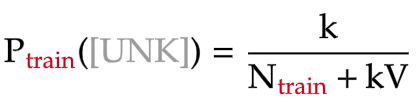

### **K-Smoothing**
- Instead of adding one to each count, we can add a fractional count $k$.
- K can take values from 0 until 1, for e.g.: - 0.5, 0.05, 0.01 etc.
- K must be chosen carefully by optimizing on the dev set.
- K Smoothing can be derived using:
    - $P_{Add-k}^*(w_n|w_{n-1})$ = $\frac {C(w_{n-1}w_n) + k} {C(w_{n-1}) + kV}$

### **Backoff and Interpolation**
- Most applied technique for OOV and produces the best results when compared to smoothing techniques.
- Instead of smoothing and shifting the distribution, we can rely on the knowledge we have already computed.
- In this technique, if we have no examples of a particular tri-gram P($w_n|w_{n−2}w{n−1}$) , we can simply estimate its probability by using the bigram probability P($w_n|w{n−1}$).
- In case we dont have counts to compute probability of the bi-gram, we can cascade and use the probability of the unigram P($w_n$).
- Using interpolation helps in generalization across different contexts.
- Techniques to make the interpolation effective:
    - Linear interpolation - Probabilities across each n-gram will have same weightage.
    - "λ" interpolation - Weights are assigned to the probabilities based on their computation method.
        - Tri-gram probabilites will have the highest weights, followed by bi-gram and uni-gram.    
        P($w_n|w_{n−2}w{n−1}$) = $λ1P(w_n) +λ2P(w_n|w_{n−1}) +λ3P(w_n|w_{n−2}w_{n−1})$

---
# What are some ambiguities in Natural Language Processing?
---

1.   **Lexical Ambiguity** - ambiguity in a single word
           - word silver is a noun, an adjective, or a verb?
2.   **Syntactic Ambiguity** - When sentence is parsed in different way
           - “The man saw the girl with the telescope” what does it mean?? ---- whether the man saw the girl carrying a telescope or he saw her through his telescope
        

3.   **Semantic Ambiguity** - when the meaning of the words themselves can be misinterpreted
           -  “The car hit the pole while it was moving” meaning ??
          “The car, while moving, hit the pole” or “The car hit the pole while the pole was moving”
4.   **Anaphoric Ambiguity** - ambiguity arises due to the use of anaphora entities in discourse
           - "the horse ran up the hill. It was very steep. It soon got tired." -- It is used for mapping to hill and horse both at different places
5.   **Pragmatic ambiguity** - When context of a phrase gives it multiple interpretations
           - “I like you too” means what ??
          I like you (just like you like me), OR
          I like you (just like someone else dose).



## What are the limitations of N-gram approach to Language Modeling?
- Higher the N, the better is the model. But this leads to high computation overhead and would require large computation power, which may not be easily available.
- N-grams are a sparse representation of language. This is because we build the model based on the probability of words co-occurring. Zero probabilities are assigned to words that are not present in the training corpus.
- Even with techniques to build non-zero probability models, the results may not be accurate in case of generalization of words over multiple contexts.

In [ ]:
import os
import email
import pandas as pd
import numpy as np
from tqdm import tqdm
import gc
from os import path
import re
import csv
import tensorflow as tf
from datetime import datetime
import pickle
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from collections import Counter
from nltk.tokenize import sent_tokenize
from nltk.translate.bleu_score import sentence_bleu
from sklearn.utils import shuffle
import nltk
import random
from nltk import bigrams, trigrams
from collections import Counter, defaultdict
from multiprocessing import  Pool
from nltk.corpus import reuters


In [ ]:

if __name__ == "__main__":
  # Word cloud for content , X-TO, X-From
  wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS ,
                max_font_size = 50,
                min_font_size = 10).generate(df['content'].to_string())
  # plot the WordCloud image
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  plt.show()

Smoothing in N-grams is a technique used to overcome the problem of sparsity in the training data. When training an N-gram model, we estimate the probability of each N-gram based on the frequency of its occurrence in the training data. However, some N-grams may not occur at all in the training data, which would lead to a probability of zero. This is where smoothing comes in.

Smoothing techniques work by redistributing some of the probability mass from frequent N-grams to infrequent or unseen N-grams. This ensures that all N-grams have a non-zero probability, which can improve the performance of the model.

There are a variety of different smoothing techniques that can be used, but some of the most common ones include:

Laplace smoothing: This technique adds one to the count of each N-gram, including unseen N-grams. This ensures that all N-grams have a non-zero probability.
Additive smoothing: This technique adds a small value, such as 0.1, to the count of each N-gram, including unseen N-grams. This also ensures that all N-grams have a non-zero probability.
Kneser-Ney smoothing: This technique is a more sophisticated smoothing technique that takes into account the context of the N-gram. It is often more effective than other smoothing techniques, but it can also be more computationally expensive.
The best smoothing technique to use depends on the specific application and the size of the training data. For example, Laplace smoothing is a simple and effective smoothing technique for small training datasets. However, Kneser-Ney smoothing is a more effective smoothing technique for large training datasets.

Here is an example of how smoothing can be used to improve the performance of an N-gram model:

Suppose we have a bigram model trained on the following corpus:

I love cats.
I love dogs.
The bigram model would learn that the probability of the bigram "love cats" is 0.5, and the probability of the bigram "love dogs" is 0.5. However, the bigram "love elephants" would not occur at all in the training data, so the bigram model would assign it a probability of zero.

If we use Laplace smoothing to smooth the bigram model, the probability of the bigram "love elephants" would be non-zero. This is because Laplace smoothing adds one to the count of each bigram, including unseen bigrams.

This can improve the performance of the bigram model, because it allows the model to generate sentences that contain unseen bigrams. For example, the bigram model could now generate the sentence "I love elephants."

Smoothing is a powerful technique that can be used to improve the p

Perplexity is a measure of how well a language model predicts a sequence of words. A lower perplexity indicates that the language model is better able to predict the sequence of words.

Perplexity is often used to evaluate the performance of language models on machine translation and text summarization tasks.

In [ ]:

One-to-one RNNs: Predicting the next word in a sentence, classifying a sequence of inputs as spam or not spam
Many-to-one RNNs: Summarizing a news article, translating a sentence from one language to another
One-to-many RNNs: Generating text, generating music
Many-to-many RNNs: Translating a sentence from one language to another, recognizing speech

# What is being learnt?

* Similar to the MLP architecture we have weight matrices in RNN which are learnt during the training.
    * <b>W<sub>hx</sub></b>: The weight matrix at the input
    * <b>W<sub>hh</sub></b>: The weight matrix at the hidden state
    * <b>W<sub>hy</sub></b>: The weight matrix at the output
* Note: The same set of weights will be applied at each time steps during the training.


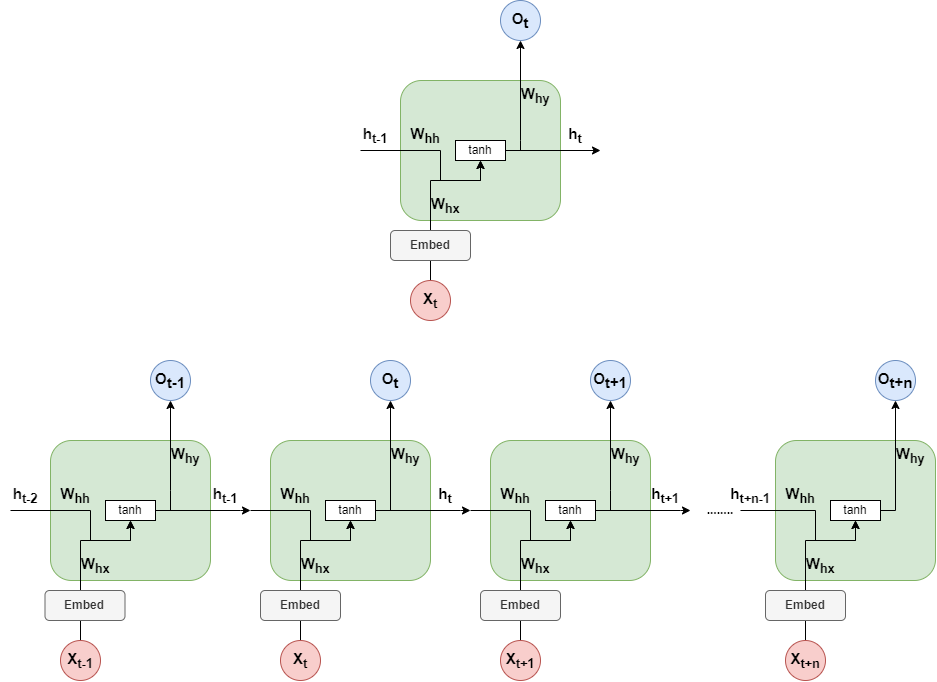

For the ease of notations, Let's call the following Weight matrices as

<b>W<sub>hx</sub> = U </b>
<br>
<b>W<sub>hy</sub> = V </b>
<br>
<b>W<sub>hh</sub> = W </b>


<b>Z<sub>yt</sub>, <b>Z<sub>ht</sub> = Intermediate results</b>
<br>
<b>σ = Activation function</b>
<br>
<b>Y = Actual </b>
<br>
<b>L = Loss function</b>

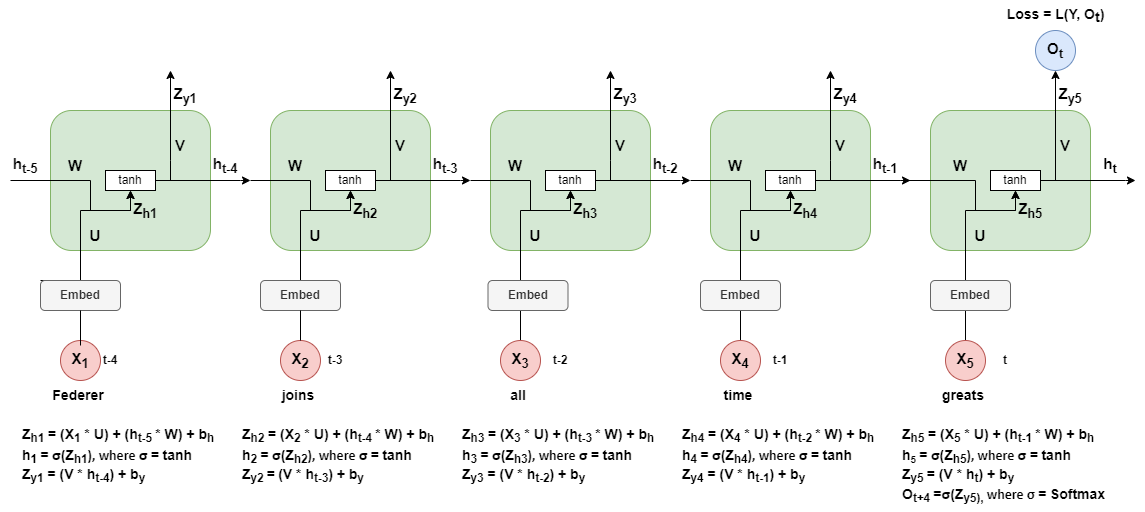

### Steps in Forward Propagation

<font size = '4'>
For each word in the input:
<br>
$\;\;\;\;\;$ 1. Multiply previous hidden state with weight matrix W
<br>
$\;\;\;\;\;$ 2. Multiply input word with weight matrix U
<br>
$\;\;\;\;\;$ 3. Add 1. and 2. and bias
<br>
$\;\;\;\;\;$ 4. Apply the Non-Linear Activation Function (tanh)
<br>
$\;\;\;\;\;\;\;\;\;\;$ i. A copy of 4. is mutiplied with weight matrix V
<br>
$\;\;\;\;\;\;\;\;\;\;$ ii. Add bias to 4i. and apply the non-Linear Activation function(based on usecase)
<br>
$\;\;\;\;\;\;\;\;\;\;$ ii. Calculate Loss (based on usecase)
<br>
$\;\;\;\;\;$ 5. A copy of 4. is passed as hidden state to the next time step
    

The above steps can be mathematically generalized as
<br>    
<font size = '4'>
$\;\;\;\;\;\;$ Z<sub>ht</sub> = U*X<sub>t</sub> + W*h<sub>t-1</sub> + b<sub>h</sub>
<br>
$\;\;\;\;\;\;$ h<sub>t</sub> = σ<sub>h</sub>(Z<sub>ht</sub>)
<br>
$\;\;\;\;\;\;$ Z<sub>yt</sub> = V*h<sub>t</sub> + b<sub>y</sub>
<br>
$\;\;\;\;\;\;$ O<sub>t</sub> = σ<sub>y</sub>(Z<sub>yt</sub>)
<br>
$\;\;\;\;\;\;$ L = L(O<sub>t</sub>, Y<sub>t</sub>)

</font>

In [ ]:
# How Backward propagation is different in RNN?

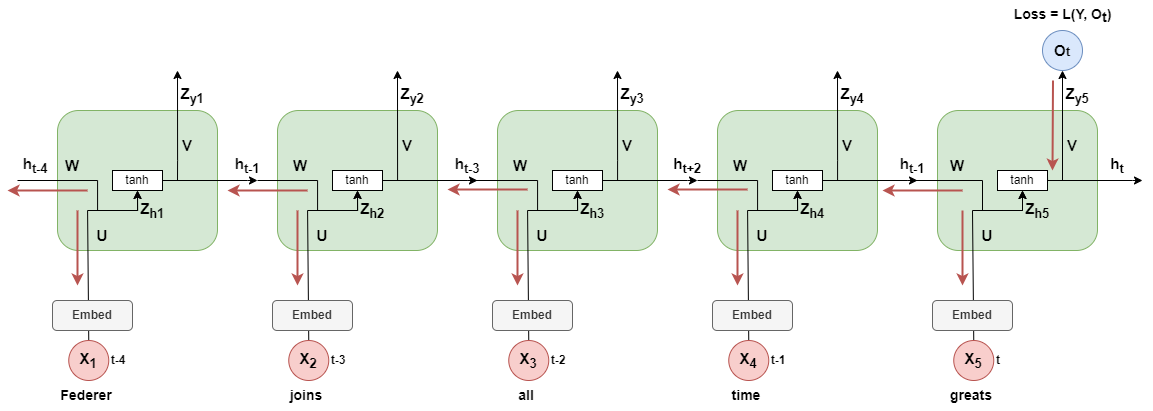

### Usual steps involved in updating parameter weights:

* Calculate the gradients of the loss with respect to the parameters
* Multiply it with the Learning rate
* Update the new weights

<font size='4.5'>

$$
V = V - \alpha \frac{\partial \mathbf{L}}{\partial \mathbf{V}}
$$
    
$$
W = W - \alpha \frac {\partial \mathbf{L}}{\partial \mathbf{W}}
$$

    
$$
U = U - \alpha \frac{\partial \mathbf{L}}{\partial \mathbf{U}}
$$

$$\alpha - Learning \ rate $$

</font>    

### How is Back Propagation Through Time(BPPT) different from the usual backpropagation?
</font>

* <b>Same weight matrices are used</b>
<br>
    In MLP based architecture the weights are not repeated at differenent layers whereas in RNN the same weight matrices are used at each time step


* <b>The gradients are added at each step to make an update</b>
<br>
    Since the same weights are used at each time step, the gradients are summed together at each time step to make one update to the weight matrices

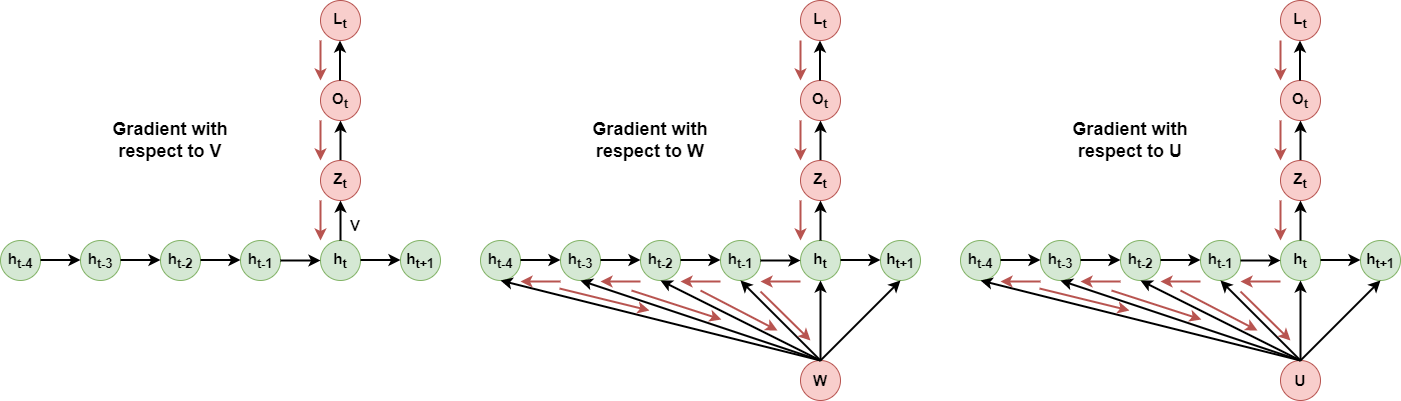

# What is Loss function?

#### What is a Loss function and why we need?
* The Loss function helps to determine how good or bad the model is performing comparing it with the actual output.
* These are many loss functions based on the problem we are solving and the most commonly used loss metrics are
    <br>
    * <b>Regression</b>: RMSE, MSE, SSE
    <br>
    * <b>Binary classification</b>: Binary cross-entrophy loss
    <br>
    * <b>Multiclass classification</b>: Multiclass cross-entrophy loss

#### What Loss function should we use?
Since we are solving a Multiclass classification problem, Multiclass cross-entrophy loss is the right metric to use
<br>   
<font size = '4'>
$
L_t = -Y\log(O_t)
$



# How optimization is done with respect to V?

<br>
$\;\;\;\;$* As a first step we need to calculate the gradients of the loss <b>L<sub>t</sub></b> at time <b>t</b> with respect to the weight matrix <b>V</b>
    <br>
$\;\;\;\;$* As we go through the path we see that <b>O<sub>t</sub></b> depends on <b>Z<sub>t</sub></b> to reach <b>V</b> and will make use of the chain rule to calculate the gradients.
<br>
<br>    
    
<font size='4.5'>

$
\frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{V}} =
\frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{O_t}} * \frac{\partial  \mathbf{O_t}}{\partial \mathbf{Z_t}} * \frac{\partial  \mathbf{Z_t}}{\partial \mathbf{V}}
$
    
#### Update the weight matrix V
    
$
V = V - \alpha \frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{V}}
$
   
</font>

# How optimization is done with respect to W?

<br>
    As a first step we need to calculate the gradients of the loss <b>L<sub>t</sub></b> at time <b>t</b> with respect to the weight matrix <b>W</b>
    <br>
$\;\;\;\;$* As we go through the path we see that <b>h<sub>t</sub></b> depends on <b>W</b> and <b>h<sub>t-1</sub></b> directly. But <b>h<sub>t-1</sub></b> indirectly depends on <b>W</b>.
    <br>
$\;\;\;\;$* When we look at <b>h<sub>t-1</sub></b>, it directly depends on <b>W</b> and <b>h<sub>t-2</sub></b>. But <b>h<sub>t-2</sub></b> indirectly depends on <b>W</b>.
    <br>
$\;\;\;\;$* This keeps chaining due to the dependencies on time and we can calculate the gradients with respect to each time step  using the chain rule in calculus
    <br>
$\;\;\;\;$* A very important thing to note here is the weight matrix <b>W</b> is common across all the time steps
    
<br>    
<font size='4'>

$
\frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{W}} =
\frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{O_t}} * \frac{\partial  \mathbf{O_t}}{\partial \mathbf{Z_t}} * \frac{\partial  \mathbf{Z_t}}{\partial \mathbf{h_t}} * \frac{\partial  \mathbf{h_t}}{\partial \mathbf{W}}
$
</font>
    
<font size='4'>
    
#### Gradients of loss with respect to W at different t
<br>
$
\;\;\;\;\;\;\;\;
\color{magenta}{
\frac{\partial  \mathbf{h_{t}}}{\partial \mathbf{W}} =
\frac{\partial  \mathbf{h_{t}}}{\partial \mathbf{W}} + \frac{\partial  \mathbf{h_t}}{\partial \mathbf{h_{t-1}}} * \frac{\partial  \mathbf{h_{t-1}}}{\partial \mathbf{W}}
}
\\
\;\;\;\;\;\;\;\;
\color{red}{
\frac{\partial  \mathbf{h_{t-1}}}{\partial \mathbf{W}} =
\frac{\partial  \mathbf{h_{t-1}}}{\partial \mathbf{W}} + \frac{\partial  \mathbf{h_{t-1}}}{\partial \mathbf{h_{t-2}}} * \frac{\partial  \mathbf{h_{t-2}}}{\partial \mathbf{W}}
}
\\
\;\;\;\;\;\;\;\;
\color{green}{
\frac{\partial  \mathbf{h_{t-2}}}{\partial \mathbf{W}} =
\frac{\partial  \mathbf{h_{t-2}}}{\partial \mathbf{W}} + \frac{\partial  \mathbf{h_{t-2}}}{\partial \mathbf{h_{t-3}}} * \frac{\partial  \mathbf{h_{t-3}}}{\partial \mathbf{W}}
}
\\\;\;\;\;\;\;\;\;
\color{orange}{
\frac{\partial  \mathbf{h_{t-3}}}{\partial \mathbf{W}} =
\frac{\partial  \mathbf{h_{t-3}}}{\partial \mathbf{W}} + \frac{\partial  \mathbf{h_{t-3}}}{\partial \mathbf{h_{t-4}}} * \frac{\partial  \mathbf{h_{t-4}}}{\partial \mathbf{W}}
}
\\
\;\;\;\;\;\;\;\;
\color{yellow}{
\frac{\partial  \mathbf{h_{t-4}}}{\partial \mathbf{W}} =
\frac{\partial  \mathbf{h_{t-4}}}{\partial \mathbf{W}} + \frac{\partial  \mathbf{h_{t-4}}}{\partial \mathbf{h_{t-5}}} * \frac{\partial  \mathbf{h_{t-5}}}{\partial \mathbf{W}}
}
$

</font>


<font size='4'>

#### Bringing all together
<br>
$
\frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{W}} =
\frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{O_t}} * \frac{\partial  \mathbf{O_t}}{\partial \mathbf{Z_t}} * \frac{\partial  \mathbf{Z_t}}{\partial \mathbf{h_t}}
\color{magenta}{
(\frac{\partial  \mathbf{h_{t}}}{\partial \mathbf{W}} + \frac{\partial  \mathbf{h_t}}{\partial \mathbf{h_{t-1}}} *
(
\color{red}{
\frac{\partial  \mathbf{h_{t-1}}}{\partial \mathbf{W}} + \frac{\partial  \mathbf{h_{t-1}}}{\partial \mathbf{h_{t-2}}} *
(
\color{green}{
\frac{\partial  \mathbf{h_{t-2}}}{\partial \mathbf{W}} + \frac{\partial  \mathbf{h_{t-2}}}{\partial \mathbf{h_{t-3}}} *
(
\color{orange}{
\frac{\partial  \mathbf{h_{t-3}}}{\partial \mathbf{W}} + \frac{\partial  \mathbf{h_{t-3}}}{\partial \mathbf{h_{t-4}}} *  
(
\color{yellow}{
\frac{\partial  \mathbf{h_{t-4}}}{\partial \mathbf{W}} + \frac{\partial  \mathbf{h_{t-4}}}{\partial \mathbf{h_{t-5}}} *  
\frac{\partial  \mathbf{h_{t-5}}}{\partial \mathbf{W}}
}
)
}
)
}
)
})
}
)
$
</font>

<font size='4'>

#### Expanding it
<br>
$
\frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{W}} =
\frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{O_{t}}}
\frac{\partial  \mathbf{O_{t}}}{\partial \mathbf{Z_{t}}}
\frac{\partial  \mathbf{Z_{t}}}{\partial \mathbf{h_{t}}}
\color{magenta}{\frac{\partial  \mathbf{h_{t}}}{\partial \mathbf{W}}} +
\\
\;\;\;\;\;\;\;\; \frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{O_{t}}}
\frac{\partial  \mathbf{O_{t}}}{\partial \mathbf{Z_{t}}}
\frac{\partial  \mathbf{Z_{t}}}{\partial \mathbf{h_{t}}}
\color{magenta}{\frac{\partial  \mathbf{h_{t}}}{\partial \mathbf{h_{t-1}}}}
\color{red}{\frac{\partial  \mathbf{h_{t-1}}}{\partial \mathbf{W}}} +
\\
\;\;\;\;\;\;\;\; \frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{O_{t}}}
\frac{\partial  \mathbf{O_{t}}}{\partial \mathbf{Z_{t}}}
\frac{\partial  \mathbf{Z_{t}}}{\partial \mathbf{h_{t}}}
\color{magenta}{\frac{\partial  \mathbf{h_{t}}}{\partial \mathbf{h_{t-1}}}}
\color{red}{\frac{\partial  \mathbf{h_{t-1}}}{\partial \mathbf{h_{t-2}}}}
\color{green}{\frac{\partial  \mathbf{h_{t-2}}}{\partial \mathbf{W}}} +
\\
\;\;\;\;\;\;\;\; \frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{O_{t}}}
\frac{\partial  \mathbf{O_{t}}}{\partial \mathbf{Z_{t}}}
\frac{\partial  \mathbf{Z_{t}}}{\partial \mathbf{h_{t}}}
\color{magenta}{\frac{\partial  \mathbf{h_{t}}}{\partial \mathbf{h_{t-1}}}}
\color{red}{\frac{\partial  \mathbf{h_{t-1}}}{\partial \mathbf{h_{t-2}}}}
\color{green}{\frac{\partial  \mathbf{h_{t-2}}}{\partial \mathbf{h_{t-3}}}}
\color{orange}{\frac{\partial  \mathbf{h_{t-3}}}{\partial \mathbf{W}}} +
\\
\;\;\;\;\;\;\;\; \frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{O_{t}}}
\frac{\partial  \mathbf{O_{t}}}{\partial \mathbf{Z_{t}}}
\frac{\partial  \mathbf{Z_{t}}}{\partial \mathbf{h_{t}}}
\color{magenta}{\frac{\partial  \mathbf{h_{t}}}{\partial \mathbf{h_{t-1}}}}
\color{red}{\frac{\partial  \mathbf{h_{t-1}}}{\partial \mathbf{h_{t-2}}}}
\color{green}{\frac{\partial  \mathbf{h_{t-2}}}{\partial \mathbf{h_{t-3}}}}
\color{orange}{\frac{\partial  \mathbf{h_{t-3}}}{\partial \mathbf{h_{t-4}}}}
\color{yellow}{\frac{\partial  \mathbf{h_{t-4}}}{\partial \mathbf{W}}} +
\\
\;\;\;\;\;\;\;\; \frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{O_{t}}}
\frac{\partial  \mathbf{O_{t}}}{\partial \mathbf{Z_{t}}}
\frac{\partial  \mathbf{Z_{t}}}{\partial \mathbf{h_{t}}}
\color{magenta}{\frac{\partial  \mathbf{h_{t}}}{\partial \mathbf{h_{t-1}}}}
\color{red}{\frac{\partial  \mathbf{h_{t-1}}}{\partial \mathbf{h_{t-2}}}}
\color{green}{\frac{\partial  \mathbf{h_{t-2}}}{\partial \mathbf{h_{t-3}}}}
\color{orange}{\frac{\partial  \mathbf{h_{t-3}}}{\partial \mathbf{h_{t-4}}}}
\color{yellow}{\frac{\partial  \mathbf{h_{t-4}}}{\partial \mathbf{h_{t-5}}}}
\color{yellow}{\frac{\partial  \mathbf{h_{t-5}}}{\partial \mathbf{W}}}
$
    
</font>


<font size='4'>
    
#### Let's generalize this to a single formula

$
\frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{W}} =
\frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{O_{t}}}
\frac{\partial  \mathbf{O_{t}}}{\partial \mathbf{Z_{t}}}
\frac{\partial  \mathbf{Z_{t}}}{\partial \mathbf{h_{t}}}
\sum\limits_{r=1}^t {\frac{\partial  \mathbf{h_{t}}}{\partial \mathbf{h_r}}} {\frac{\partial  \mathbf{h_r}}{\partial \mathbf{W}}}
$

#### Update the weight matrix W
$
W = W - \alpha \frac {\partial \mathbf{L_t}}{\partial \mathbf{W}}
$

</font>


<font size='4'>
    


# How optimization is done with respect to U?

Taking the derivative of <b>U</b> is similar to how we calcualted the gradients with respect to <b>W</b>. It also requires taking sequential derivatives with respect to <b>h<sub>t</sub></b>. So we can rewrite the same formula we derived and replace <b>W</b> with <b>U</b>

<font size='4'>
<br>
$
\frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{U}} =
\frac{\partial  \mathbf{L_{t}}}{\partial \mathbf{O_{t}}}
\frac{\partial  \mathbf{O_{t}}}{\partial \mathbf{Z_{t}}}
\frac{\partial  \mathbf{Z_{t}}}{\partial \mathbf{h_{t}}}
\sum\limits_{r=1}^t {\frac{\partial  \mathbf{h_{t}}}{\partial \mathbf{h_r}}} {\frac{\partial  \mathbf{h_r}}{\partial \mathbf{U}}}
$
    
#### Update the weight matrix U
$
U = U - \alpha \frac{\partial \mathbf{L_t}}{\partial \mathbf{U}}
$



### Weight initialization

* Initializing the weights also play a very important role due to which the Vanishing and the exploding gradients arise
* Initializing the weights with Xavier intialization or He initialization forces the varaince of the weights to be smaller.
* This can help in mitigating the problem of Vanishing and Exploding gradients.

There are 4 ways of weight initialization

<b>Normal Xavier initilization:</b> Initialize the weights by drawing from a normal distribution with
<br>
<font size='3'> $ Mean = 0,  SD = \sqrt {{\frac {2} {(fan_{in} + fan_{out})}} }$</font>

<b>Uniform Xavier initilization:</b> Initialize the weights by drawing from a uniform distribution
<br>
<font size='3'> $between [-w,  w], w = \sqrt {{\frac {6} {(fan_{in} + fan_{out})}} }$</font>

<b>Normal He initilization:</b> Initialize the weights by drawing from a normal distribution
<br>
<font size='3'>$Mean = 0,  SD = \sqrt {{\frac {2} {(fan_{in})}} }$</font>

<b>Uniform He initilization:</b> Initialize the weights by drawing from a uniform distribution
<br>
<font size='3'> $between [-w,  w], w = \sqrt {{\frac {6} {(fan_{in})}} }$</font>


Note: <font size='3'>$fan_{in}, fan_{out}$</font> mean the number of neurons coming in and going out respectively.

# What if we had a multi-output problem? MultiLoss

In the example we saw above, there was only one output because it was a many to one type of RNN.

Incase of many to many or one to many we will have more than one output at each time t.

So we will have to add the losses at each timesteps to get the overall loss and proceed with the BPPT just as explaine above

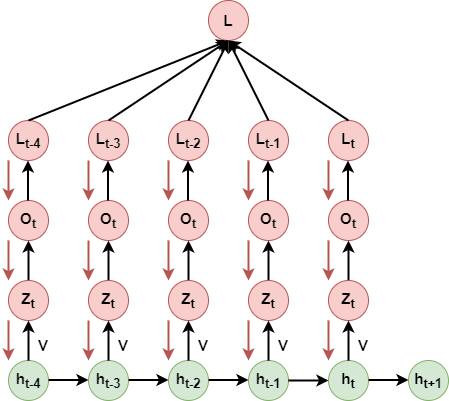

<font size = '5'>
$
L = \sum\limits_{r=1}^t {L_r}
$

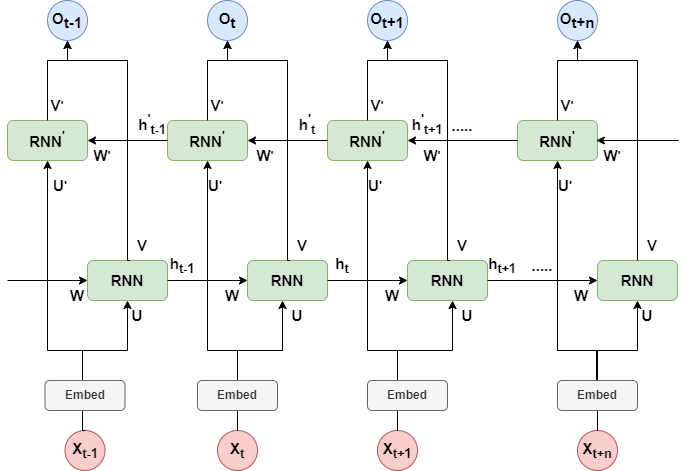

<font size = '5'>
$
L = \sum\limits_{r=1}^t {L_r}
$

---
# Can we use information from the future as well?
---
Yes we can, and it's called <font size='5'><b>Bidirectional RNN</b></font>

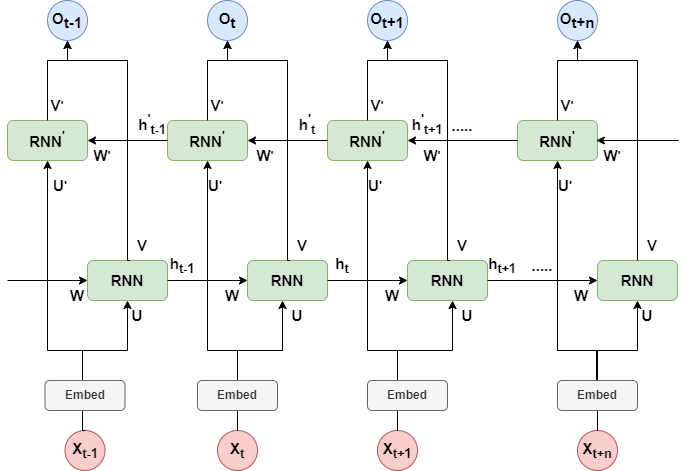

$\;\;\;\;\;\;\;\;\;\;\;\;$ <b>Scenarion 1</b>: Sachin Tendular was <font color= 'red'><u>_____</u></font> ____ ____ ____
<br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <b>Scenarion 2</b>: Sachin Tendular was _____ of Rajya Sabha
<br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <b>Answer</b>: Sachin Tendular was <font color= 'green'><u>MP</u></font> of Rajya Sabha
<br>

In the scenario 2, it's easier to predict the word "MP" if we had access to input from both the left and the right of the current word instead of only the words from the left.

Difference between UniDirectional and BiDirectional RNN


|| <font size='4'>UniDirectional RNN | <font size='4'>Bidirectional RNN|
|---|---------------|----|
|<font size='2'><b>Information flow</b>|<font size='2'> Left to Right|<font size='2'> Left to Right & Right to Left|
|<font size='2'><b>Output depends</b>|<font size='3'> h<sub>t-1</sub>, X<sub>t</sub> | <font size='3'> h<sub>t-1</sub>, X<sub>t</sub>, h<sub>t+1</sub> |
|<font size='2'><b>Weights</b>|<font size='3'> W, U, V | <font size='3'> W, U, V, W', U', V'|

In [ ]:
# Bidirectional RNN model
model_bidirectional_rnn = models.Sequential([
    layers.Bidirectional(layers.SimpleRNN(units=64, activation='relu', return_sequences=True),
                        input_shape=(sequence_length, input_features)),
    layers.Bidirectional(layers.SimpleRNN(units=64, activation='relu')),
    layers.Dense(units=1, activation='sigmoid')  # Assuming binary classification
])

# Choose the latent dimension and embedding dimension

<b>Latent dimension</b>: Dimension of the weight matrix U, V, W
<br>
<b>Embedding dimension</b>: Dimension of the word embeddings at the embedding layer

In [ ]:
latent_dim=50
embedding_dim=100

# Define the RNN model architecture

* The embedding layer with 100 dimension
* A single Vanilla RNN unit with 50 dimensions
* A final output layer with 5 units(5 classes) with the softmax activation function

In [ ]:
seed=56
tf.random.set_seed(seed)
np.random.seed(seed)

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, trainable=True))
model.add(SimpleRNN(latent_dim, recurrent_dropout=0.2, return_sequences=False, activation='tanh'))
model.add(Dense(total_classes, activation='softmax'))
model.summary()

In [ ]:
# Model training

* Optimizer: Adam
* Loss: Categorical cross-entrophy since it is a multiclass classification probem
* Early stopping: Used to stop training if validation accuracy does not improve while training to avoid overfitting

In [ ]:
import datetime

tf.random.set_seed(seed)
np.random.seed(seed)

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

early_stopping = EarlyStopping(monitor='val_acc',
                               mode='max',
                               verbose=1,
                               patience=5)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=train_text_X, y=train_Y,
          validation_data=(test_text_X, test_Y),
          batch_size=64,
          epochs=10,
          callbacks=[early_stopping, tensorboard_callback])

In [ ]:
prediction = model.predict(test_text_X)
prediction = prediction.argmax(axis=1)
print(f"Accuracy: {accuracy_score(prediction, validation)}")

In [ ]:
import tensorflow as tf

# Create an embedding layer to convert words to vectors.
embedding_layer = tf.keras.layers.Embedding(input_dim=10000, output_dim=128)

# Create a gated recurrent unit (GRU) cell with 128 hidden units.
gru_cell = tf.keras.layers.GRUCell(128)

# Create an RNN layer with the GRU cell.
rnn_layer = tf.keras.layers.RNN(gru_cell, return_sequences=True)

# Create an attention layer.
attention_layer = tf.keras.layers.Attention()

# Create a model with the embedding layer, the RNN layer, and the attention layer.
model = tf.keras.Sequential([
    embedding_layer,
    rnn_layer,
    attention_layer,
    tf.keras.layers.Dense(10000)
])

# Compile the model.
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Train the model on a corpus of text.
model.fit(x_train, y_train, epochs=10)

# Generate text using the model.
def generate_text(model, seed_text, max_length=100):
    # Start with the seed text.
    text = seed_text

    # Generate text until the maximum length is reached.
    while len(text) < max_length:
        # Encode the previous words to a vector.
        previous_words = embedding_layer(text[-10:])

        # Pass the previous words vector through the RNN layer to generate the next word.
        next_word = model.predict(previous_words)

        # Decode the next word vector to a string.
        next_word = tf.argmax(next_word, axis=-1).numpy()[0]

        # Add the next word to the text.
        text += next_word

    return text

# Generate a sentence using the model.
generated_sentence = generate_text(model, seed_text='I love to code')

# Print the generated sentence.
print(generated_sentence)
